# Moment Estimation of transcriptional parameters

From Bagnall et al. 2020



$$
\begin{align}
   b_m &= \frac{\sigma^2}{\mu} \\\
   \\\
   f_m &= \frac{\mu}{b_m-1} \\\
   \\\
   f_m &= \frac{\mu^2}{\sigma^2-\mu} \\\
   \\\
\end{align}    
$$

- Moments scRNAseq


In [57]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using Seaborn, PyPlot, PyCall, DataFrames
using NoLongerProblems_Pandas, Pandas
using MultipleTesting, HypothesisTests 
using SingleCellExperiment
using CSV, ProgressMeter,PrettyPlotting, ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")
include("../Code/Load_scRNAseqData.jl")

function calculate_moments(sceexp)
    genedata = sceexp.rowData
    cols = names(genedata)
    samples = cols[[occursin("__mu", ii) for ii in cols]]
    samples = [split(ii, "__")[1] for ii in samples]
    for s in samples
        genedata[!,s*"__bm"] = (genedata[!,s*"__std"].^2) ./ genedata[!,s*"__mu"]
        genedata[!,s*"__fm"] = genedata[!,s*"__mu"].^2 ./ ((genedata[!,s*"__std"].^2) .- genedata[!,s*"__mu"])
    end
    sceexp.rowData = genedata
    sceexp
end

sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];
sce = calculate_moments(sce)

include("momentcalculation.jl")
include("testfunctions.jl")


do_mantelhaen (generic function with 1 method)

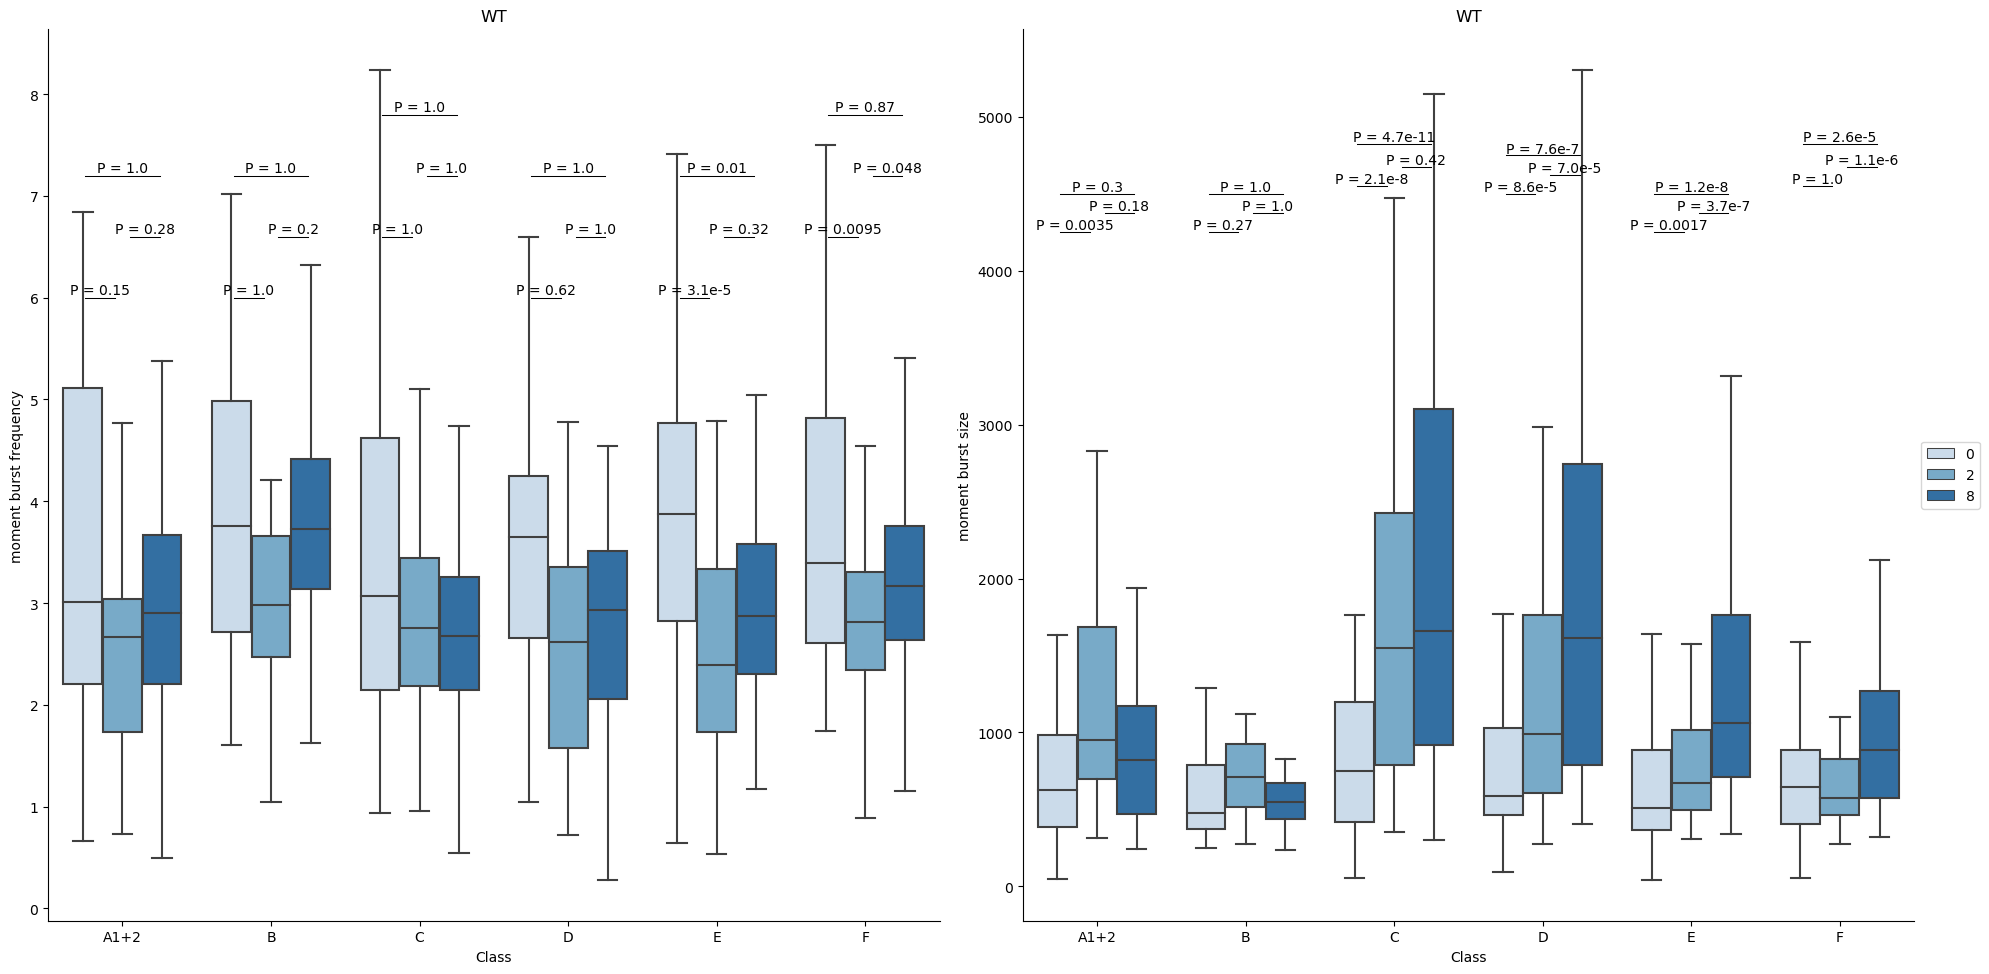

Percent 20.0%
Total genes considered 356


In [58]:
alpha = 0.2
include("scRNAseqmomentsWT.jl")